<h3 style="color: #001a79;">Exercise 1.1</h3>

<hr style="border-top: 1px solid #001a79;" />

Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.



The lady tea test is a simple count of the number of successes in selecting the 4 cups (the number of cups of the given type successfully selected). The distribution of possible numbers of successes can be computed using the number of combinations. Using the combination formula, with n=8 total cups and k=4 cups chosen, there are:

<br>
$${8 \choose 4} = \frac{8!}{4!(8-4)!} = 70$$<br>
<br>
possible combinations.
Here, the first part of the equation means 8 choose 4.

The following is adapted from https://stackoverflow.com/a/56405822
First improt math mocule to be able to use math.comb method, which is also known as combinations, returns the number of ways to choose k unordered outcomes from n possibilities without repetition. [1]

In [1]:
# Math module
import math

# Number of ways of selecting 4 cups from 8.
math.comb(8,4)

70

In [2]:
# Number of ways selecting 5 cups from 10
math.comb(10,5)

252

In [3]:
# Probability of randomly selecting correct 5 cups out of 10 is:
1.0/ math.comb(10,5)

0.003968253968253968

If the experiment was done with 10 cups total, five with milk in first and five with tea in first, then the chance of selecting correctly randomly is much less than 1%.

We can also design the experiment to have 9 cups in total, where 4 cups will be filled with milk first and 5 with tea first - or vice versa.

In [4]:
# Number of ways of selecting 4 cups from 9.
math.comb(9,4)

126

In [5]:
# Probability of randomly selecting correct 4 cups out of 9 is:
1.0/math.comb(9,4)

0.007936507936507936

Which is also less than 1%.

In [6]:
# We will get the same number of combinations if we select 5 cups out of 9, which means the probability is the same:
math.comb(9,5)

126

This is because with 9 cups, we are segregating them into groups of 4 and 5. 4 with the milk in first and 5 with the tea in first or vice versa. So 9 choose 4 is the same as 9 choose 5 because of the way that the 2 groups of cups are separated.

#### *Bonus:* How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?

As per above, there are 70 number of way of selecting 4 cups from 8. For the lady to get all 4 cups correct, there is clearly only one set of four choices (namely, choosing all four correct cups). This is where the 1 comes from in the numerator:

In [7]:
1.0/70.0

0.014285714285714285

But to allow the lady to get one cup wrong, the sets of for choices are 4 choose 3 and 4 choose 1.

In [8]:
math.comb(4, 3)

4

In [9]:
math.comb(4, 1)

4

Thus a selection of any one correct cup and any three correct cups can occur in any of 4×4 = 16 ways. [3]

In [10]:
16.0/70.0

0.22857142857142856

Therefore, the lady has a greater than 20% chance to get 3/4 cups correct. For the lady to get one cup wrong while maintaining the 1% threshold, the number of cups would have to be increased in the experiment. Let's try with 12 cups overall.

In [11]:
math.comb(12, 6)

924

In [12]:
math.comb(6, 5)

6

In [13]:
math.comb(6, 1)

6

Thus a selection of any one correct cup and any four correct cups can occur in any of 6×6 = 36 ways.

In [14]:
36.0/924.0

0.03896103896103896

The lady has less around 3% chance to get 5/6 cups correct.
Let's bump the number of cups up to 16.

In [15]:
math.comb(16, 8)

12870

In [16]:
math.comb(8, 7)

8

In [17]:
math.comb(8, 1)

8

Thus a selection of any one correct cup and any four correct cups can occur in any of 8×8 = 64 ways. 

In [18]:
64.0/12870.0

0.004972804972804973

When we have 16 cups in total, the lady has less around 0.5% chance to get 7/8 cups correct.

<h3 style="color: #001a79;">Exercise 1.2</h3>

<hr style="border-top: 1px solid #001a79;" />
Use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html" style="color: #ff791e">scipy's version of Fisher's exact test</a> to simulate the Lady Tasting Tea problem.
***

Scipy's version of Fisher's exact test is a scipy method that performs a Fisher exact test on a 2x2 contingency table. A contingency table displays frequencies for combinations of two categorical variables. They can also be refered to as crosstabulation and two-way tables. Contingency tables classify outcomes for one variable in rows and the other in columns. The values at the row and column intersections are frequencies for each unique combination of the two variables. [2]<br>
So, for the lady tea tasting experiment, for the lady to guess all four cups correctly, The below contingency table (table 1) illustrates `scipy.stats.fisher_exact`.

|| Actual Tea | Actual Milk |
| :- | -: | :-: |
| Selected Tea | 4 | 0|
| Selected Milk | 0 | 4|

The 'Actual Tea' refers to the tea with the tea in first and is the correct answer. 'The Actual Milk' refers to the tea with the milk in first and is the correct answer. The 'Selected Tea' refers to the tea with the tea in first that the lady selects. The 'Selected Milk' refers to the tea with the milk in first that the lady selects. <br>

`scipy.stats.fisher_exact` takes in 2 paramaters. 'Table', which is a 2x2 contingency table and 'alternative' which needs to be explored below. Let's start by importing scipy statistical methods.

In [19]:
# Statistical methods.
import scipy.stats as ss

In [20]:
ss.fisher_exact

<function scipy.stats.stats.fisher_exact(table, alternative='two-sided')>

We can see from the above code that the default of the parameter 'alternative' is 'two sided'. Let's insert the contingency table for the lady to guess 4 cups correctly as the first parameter in `scipy.stats.fisher_exact`

In [21]:
ss.fisher_exact([[4, 0], [0, 4]])

(inf, 0.028571428571428536)

The answer looks to be 2 times the value that we got from using `math.comb()` from the first section of this notebook.

In [22]:
# Answer from section one multiplied by 2.
0.014285714285714285 * 2

0.02857142857142857

As Fisher's Exact test defaults to two-sided test, it might be the cause to different result.

We look at the syntax options for Fisher's Exact test available in Scipy:<br>
`scipy.stats.fisher_exact(table, alternative='two-sided')`<br>
First 2x2 contingency table is passed followed by optional alternative parameters:<br>
*‘two-sided’*- the odds ratio of the underlying population is not one.<br>
*‘less’*- the odds ratio of the underlying population is less than one.<br>
*‘greater’*- the odds ratio of the underlying population is greater than one.

In [23]:
ss.fisher_exact([[4, 0], [0, 4]], alternative = 'less')

(inf, 1.0)

In [24]:
ss.fisher_exact([[4, 0], [0, 4]], alternative = 'greater')

(inf, 0.014285714285714268)

It seems that when the 'alternative' parameter is changed to 'greater', we are getting the target answer that was confirmed in the first section.

The first value returned is called the oddsratio and the second value returned is the p-value which the probability. 

Going back to the alternative 'parameter', there are two types of alternative. Two-sided and one-sided. The two types of one-sided are 'less' and 'greater'. [3] They are also sometimes known as left and right tailed. A 'Two-sided' Fisher’s Exact Test is when the null hypothesis odds ratio is equal to 1 and the alternative hypothesis is not equal to 1. A 'Less' Fisher’s Exact Test is when the null hypothesis odds ratio is greater than or equal to 1 and the alternative hypothesis is less than 1. A 'Greater' Fisher’s Exact Test is when the null hypothesis odds ratio is less than or equal to 1 and the alternative hypothesis is greater than 1.

This means that for the lady to get all cups correct and for the experiment to have the same result as using `math.comb()` as in section one, the alternative hypothesis must be that the odds ratio is greater than 1.

<h3 style="color: #001a79;">Exercise 2</h3>

<hr style="border-top: 1px solid #001a79;" />
- Take the code from the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html" style="color: #ff791e">Examples section of the scipy stats documentation for independent samples t-tests</a>, add it to your own notebook and add explain how it works using MarkDown cells and code comments. <br>
- Improve it in any way you think it could be improved.

***


#### t-Test
t-Test is statistical test to determine if there is a significant difference between the means of two populations. It is calculated by dividing variance between groups from variance within groups. [4]

* Large t-value means two groups under test belongs to different groups.
* Small t-value means two two groups under test belongs to the same groups.

The null hypothesis for t-test is that both samples are drawn from populations with the same population means. If probability is less than pre-set tolerance threshold- there are enough evidence to reject null hypothesis.

In [25]:
# Importing required packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Reproducible random data can be generated using seed parameter. It pre-sets generator to use the same pattern providing same output each time.

In [26]:
# Generate random number generator (rng) using numpy
rng = np.random.default_rng(12)

The `scipy.stats.norm` function creates a normal continuous random variable. It has many different methods that can be used. rvs (Random variates), pdf (Probability density function), logpdf (Log of the probability density function), cdf (Cumulative distribution function) etc.[5]<br>

The default parameters for `rsv` are `rvs(loc=0, scale=1, size=1, random_state=None)`<br>
**stats.norm.rvs** function generates random variates with function parameters **loc**- specifying the mean, **scale**- specifying standard deviation, **size**- sets required output size where **random_state**- notes seeded or unseeded number generator.

In [27]:
# Generating two arrays of random normal distribution variates 
# Mean is set at 5, standard deviation is 10 with sample size of 500
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)

Below is a performance of a standard independent 2 sample test that assumes equal population variances. This is because the parameter equal_var is set to true by default.[6]

In [28]:
# Generating t-test with equal population variance as True (default option)
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=0.011882217974088664, pvalue=0.990521959595441)

We can see above that the p-value is over 5% so we can reject the null hypothesis. If it is set to false, then a Welch’s t-test is performed instead and it does not assume equal population variance. [7] Student's t-test assumes that the sample means being compared for two populations are normally distributed, and that the populations have equal variances. Welch's t-test is designed for unequal population variances, but the assumption of a normal distribution maintained. Welch's t-test is an approximate solution to the Behrens–Fisher problem. [8]

In [29]:
# Generating t-test with equal population variance as False (Welch's t-test)
stats.ttest_ind(rvs1, rvs2, equal_var=False)

Ttest_indResult(statistic=0.011882217974088664, pvalue=0.9905219618529957)

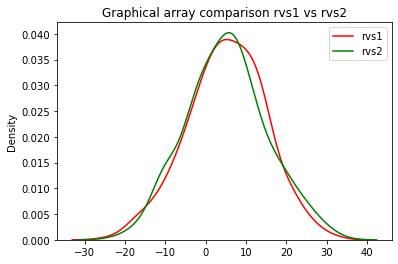

In [30]:
# Plot for generated array visualization and comparison
sns.kdeplot(rvs1, color='red', label='rvs1')
sns.kdeplot(rvs2, color='green', label='rvs2')
plt.legend()
plt.title('Graphical array comparison rvs1 vs rvs2')
plt.show()

Both **rvs1** and **rvs2** arrays were generated using same parameters and it is evident when looking at graphical representation. t-test probability indicating samples have 68% probability of being drawn from populations with the same population mean. In other words p value is greater that common rejection thresholds of 0.05 and 0.01 and it is unlikely by chance, hence null hypothesis is not rejected.

In [31]:
# Generating array of random normal distribution variates
# Mean is set at 5, standard deviation is 20 with sample size of 500
rvs3 = stats.norm.rvs(loc=5, scale=20, size=500, random_state=rng)

# Generating t-test with equal population variance as True (default option)
stats.ttest_ind(rvs1, rvs3)

Ttest_indResult(statistic=-0.30199364375231946, pvalue=0.762719828537243)

In [32]:
# Generating t-test with equal population variance as False (Welch's t-test)
stats.ttest_ind(rvs1, rvs3, equal_var=False)

Ttest_indResult(statistic=-0.30199364375231946, pvalue=0.7627439828012742)

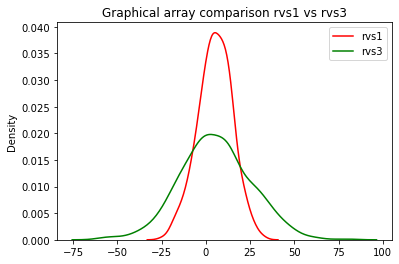

In [33]:
# Plot for generated array visualization and comparison
sns.kdeplot(rvs1, color='red', label='rvs1')
sns.kdeplot(rvs3, color='green', label='rvs3')
plt.legend()
plt.title('Graphical array comparison rvs1 vs rvs3')
plt.show()

**rvs3** array has a standard deviation of 20 where **rvs1** has a standard deviation of 10 with the rest of parameters being the same.
p value is greater that common rejection thresholds of 0.05 and 0.01 using classic and Welch T-test, null hypothesis is not rejected.

Now let's test it when the sample sizes are different, i.e. when one of the sample sizes is 500 and the other is 100. The standard deviations will also be different, the firs is 10 and the second is 20.

In [34]:
rvs4 = stats.norm.rvs(loc=5, scale=20, size=100, random_state=rng)
stats.ttest_ind(rvs1, rvs4)

Ttest_indResult(statistic=0.4124926273134, pvalue=0.6801262209165833)

In [35]:
# Generating t-test with equal population variance as False (Welch's t-test)
stats.ttest_ind(rvs1, rvs4, equal_var=False)

Ttest_indResult(statistic=0.2593699169674286, pvalue=0.7958454804788446)

We can see above that the equal variance t-statistic (student's t-test) is no longer equal to the unequal variance t-statistic (Welch's t-test). 

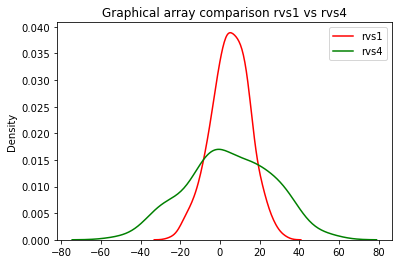

In [36]:
# Plot for generated array visualization and comparison
sns.kdeplot(rvs1, color='red', label='rvs1')
sns.kdeplot(rvs4, color='green', label='rvs4')
plt.legend()
plt.title('Graphical array comparison rvs1 vs rvs4')
plt.show()

Now let's try it with a different means, variance, and size. 
Sample 1 : mean=5, standard deviation=10, size=500 
Sample 2 : mean=8, standard deviation=20, size=100

In [37]:
rvs5 = stats.norm.rvs(loc=8, scale=20, size=100, random_state=rng)
stats.ttest_ind(rvs1, rvs5)

Ttest_indResult(statistic=-2.793894010462576, pvalue=0.0053746389564946805)

In [38]:
stats.ttest_ind(rvs1, rvs5, equal_var=False)

Ttest_indResult(statistic=-1.757341553168173, pvalue=0.08170382105011832)

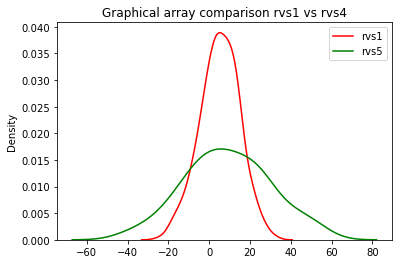

In [39]:
# Plot for generated array visualization and comparison
sns.kdeplot(rvs1, color='red', label='rvs1')
sns.kdeplot(rvs5, color='green', label='rvs5')
plt.legend()
plt.title('Graphical array comparison rvs1 vs rvs4')
plt.show()

We can see above that the equal variance t-statistic (student's t-test) is no longer equal to the unequal variance t-statistic (Welch's t-test), similar to the test where the mean and size were different. p value is greater that common rejection thresholds of 0.05 and 0.01 using classic and Welch T-test, null hypothesis is not rejected.

***

## References

***
[1]python-programs.com - Python math.comb() Method with Examples<br>
[2]statisticsbyjim.com - Contingency Table: Definition, Examples & Interpreting<br>
[3]towardsdatascience.com - Fully Mastering Fisher’s Exact Test for A/B Testing<br>
[4]Geeksforgeeks - https://www.geeksforgeeks.org/t-test/<br>
[5]scipy.org - scipy.stats.norm<br>
[6]Wikipedia - Independent two-sample t-test<br>
[7]Wikipedia - Welch's t-test
[8]]Python Scipy ttest_ind – Complete Guide

## END